In [ ]:
!pip install ultralytics --upgrade


# YOLOv8 Object Detection on X-ray Images

In this project, we used the **YOLOv8** model for object detection on X-ray images. The model was trained on a training dataset and evaluated on a validation dataset.

## Results

**Training set:**
- Precision: 0.861  
- Recall: 0.806  
- mAP50: 0.867  
- mAP50-95: 0.409  

**Validation set:**
- Precision: 0.822  
- Recall: 0.751  
- mAP50: 0.813  
- mAP50-95: 0.367  

## Analysis

- The model shows high accuracy on the training set.  
- There is a slight drop in performance on the validation set, especially in mAP50-95, indicating that the model learned well on the training data but generalizes less effectively to new images.  
- For some classes, such as Class 2, the difference between Precision and Recall is larger, showing difficulty in detecting smaller or less distinct objects.

## Visualization

Using the prediction function, we can display an image **before and after detection**, showing the bounding boxes and class labels predicted by the model. This provides a clear view of YOLO's detection performance and accuracy.



image 1/1 /content/xray_dataset/valid/images/025505_jpg.rf.cd9ce99efe54e6b802567d86d05a46a7.jpg: 640x640 1 0, 1954.1ms
Speed: 17.7ms preprocess, 1954.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


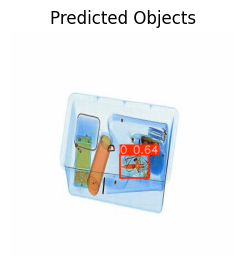

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# טען את המודל רק פעם אחת מחוץ לפונקציה
model = YOLO('/content/best.pt')

def predict_and_show(img_path, conf=0.25, imgsz=640):
    """
    מקבלת נתיב לתמונה ומחזירה תמונה מקורית ותמונה עם תחזיות YOLO
    """
    # קריאה של התמונה המקורית
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # הרצת YOLO
    results = model.predict(img_path, imgsz=imgsz, conf=conf)

    # קבלת תמונה עם מסגרות
    annotated_img = results[0].plot()  # numpy array עם מסגרות

    # הצגת התמונות
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(annotated_img)
    plt.title("Predicted Objects")
    plt.axis('off')

    plt.show()

# דוגמה לשימוש
img_path = '/content/xray_dataset/valid/images/025505_jpg.rf.cd9ce99efe54e6b802567d86d05a46a7.jpg'
predict_and_show(img_path)


